### Student Details

Student Name: ESPINOUX Jules

Student ID: 24267228


# Task 2: scikit learn

In [39]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [40]:
import pandas as pd
df = pd.read_csv('data//iris_data.csv', header=0)

################################
print("df: " + str(df.columns))

### 2 ###

iris_setoca_virginica = df[df[" class"].isin(["Iris-setosa", "Iris-virginica"])]

### 3 ###

petal_length = iris_setoca_virginica[" petal_length"]
petal_width = iris_setoca_virginica[" petal_width"]

df: Index(['sepal_length', ' sepa_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

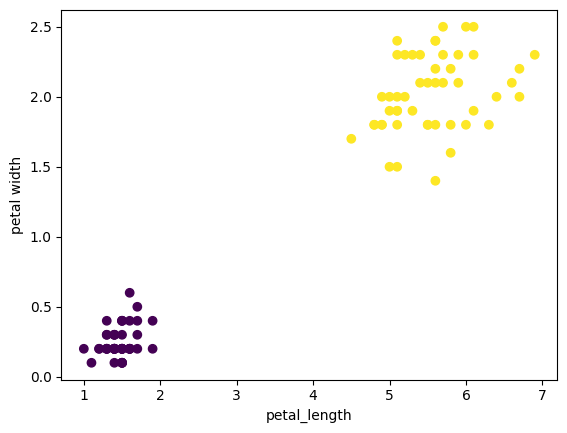

In [41]:
################################
# Your code here
import matplotlib.pyplot as plt

classes = pd.Categorical(iris_setoca_virginica[' class']).codes

plt.scatter(petal_length, petal_width, c=classes)
plt.xlabel("petal_length")
plt.ylabel("petal width")
plt.show()

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [42]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 
from sklearn.model_selection import train_test_split

################################
# Your code here

X = iris_setoca_virginica[[" petal_width", " petal_length"]]
y = iris_setoca_virginica[" class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

perceptron = Perceptron(verbose=1)
perceptron.fit(X_train, y_train)

y_predicted = perceptron.predict(X_test)

-- Epoch 1
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 67, Avg. loss: 0.286418
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 134, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 201, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 268, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 335, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 402, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.51, NNZs: 2, Bias: -3.000000, T: 469, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Yes it converges very quickly !

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

      petal_width  petal_length           class
0        1.813429      1.428418  Iris-virginica
1        1.517452      4.914185  Iris-virginica
2        1.727144      2.697387  Iris-virginica
3        1.207724      1.072206     Iris-setosa
4        2.344960      3.379204  Iris-virginica
...           ...           ...             ...
4995     0.540374      5.407346     Iris-setosa
4996     2.101276      1.514007  Iris-virginica
4997     0.172209      3.663422     Iris-setosa
4998     2.157542      1.326830  Iris-virginica
4999     1.880420      5.515834  Iris-virginica

[5000 rows x 3 columns]


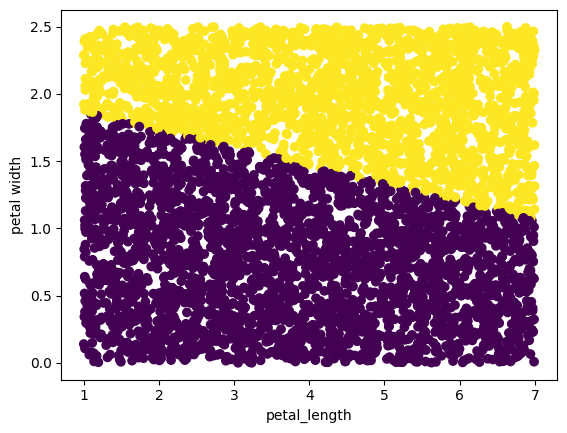

In [59]:
import random

################################

petal_length = [(random.random()*6 + 1) for _ in range(5000)]
petal_width = [random.random()*2.5 for _ in range(5000)]

X = pd.DataFrame({" petal_width": petal_width, " petal_length": petal_length})

y_predicted = perceptron.predict(X)

X[" class"] = y_predicted

print(X)

classes = pd.Categorical(X[' class']).codes

plt.scatter(petal_length, petal_width, c=classes)
plt.xlabel("petal_length")
plt.ylabel("petal width")
plt.show()

### "Commonality and differences between artificial neurons and biological neurons"

I read the following article in French: https://ichi.pro/fr/les-differences-entre-les-reseaux-de-neurones-artificiels-et-biologiques-185492888365239 

Biological and artificial neurons are fundamentally different in several aspects, including their structure, function, speed, etc. These differences shape the way each system processes information and adapts to its environment.

1. Size and Complexity:
The human brain is a vast, highly interconnected network of approximately 86 billion neurons. Each neuron connects to thousands of others, creating an immensely complex web of communication. In contrast, artificial neural networks are much simpler. While they may involve a few hundred to a few thousand artificial "neurons," they lack the intricate connectivity of biological neurons. Artificial neural networks are structured into distinct layers—input, hidden, and output layers—where each neuron in one layer is typically fully connected to neurons in the adjacent layer. This layer-based structure simplifies data flow but falls short of replicating the dense, dynamic interactions present in the human brain.

2. Topology and Connectivity:
Biological neurons operate asynchronously, meaning they fire at different times based on various stimuli and internal states. These neurons are organized into a "small-world" network, where a few neurons act as hubs, receiving and distributing large amounts of information, while the majority of neurons have fewer connections. This results in a highly efficient system with both localized and global communication. In artificial networks, computation proceeds synchronously in a sequential manner, layer by layer. While recurrent neural networks attempt to mimic the feedback loops seen in biological systems, most artificial networks follow a feedforward architecture. As a result, they are less flexible and dynamic than biological neurons, which can send feedback and adjust to new patterns on the fly.

3. Speed and Signal Transmission:
Biological neurons can fire at rates of up to 200 times per second, with signals traveling at speeds ranging from 0.5 to 120 meters per second, depending on factors such as neuron type, age, health, etc. The frequency and timing of these signals carry critical information, influencing how other neurons respond. In contrast, artificial neurons process information using numerical operations. They do not simulate the spiking behavior of biological neurons but instead rely on continuous mathematical functions to compute outputs. These operations can be computed rapidly, but they lack the rich, time-dependent dynamics seen in biological neurons. Artificial networks perform their calculations much faster than biological ones, but they do not use the temporal characteristics of signals to encode information.
